In [3]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
ROOT_DIR = '/media/erik/DATA/grab/new_joint_vecs_local'
EPISODE = 's1_airplane_lift.npy'

def load_episode(episode):
    episode_path = os.path.join(ROOT_DIR, episode)
    episode = np.load(episode_path, allow_pickle=True)
    print(f'Loaded episode {episode_path} with shape {episode.shape}')
    return episode

episode_data = load_episode(EPISODE)

Loaded episode /media/erik/DATA/grab/new_joint_vecs_local/s1_airplane_lift.npy with shape (431, 395)


In [8]:
lhand_data = episode_data[:, 269:332] # T x 63
rhand_data = episode_data[:, 332:] # T x 63

lhand_data = torch.tensor(lhand_data).float()
rhand_data = torch.tensor(rhand_data).float()

# unflatten the tensors to T x 21 x 3
lhand_data = lhand_data.unflatten(-1, (21, 3))
rhand_data = rhand_data.unflatten(-1, (21, 3))

print(f'lhand_data shape: {lhand_data.shape}')
print(f'rhand_data shape: {rhand_data.shape}')

lhand_data shape: torch.Size([431, 21, 3])
rhand_data shape: torch.Size([431, 21, 3])


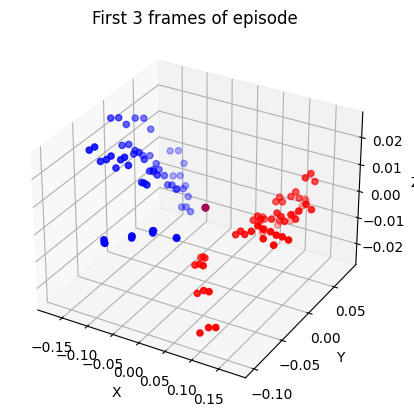

In [16]:
# plot the first 3 frames in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    lhand_frame = lhand_data[i].numpy()
    rhand_frame = rhand_data[i].numpy()

    ax.scatter(lhand_frame[:, 0], lhand_frame[:, 1], lhand_frame[:, 2], c='r')
    ax.scatter(rhand_frame[:, 0], rhand_frame[:, 1], rhand_frame[:, 2], c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('First 3 frames of episode')


plt.show()
